First 5 rows of the dataset:
   Size  Location  Number of Rooms   Price
0  1200     Urban                3  250000
1  1800  Suburban                4  320000
2  1000     Rural                2  150000
3  2100     Urban                5  400000
4  1600  Suburban                3  280000

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             10 non-null     int64 
 1   Location         10 non-null     object
 2   Number of Rooms  10 non-null     int64 
 3   Price            10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes
None

Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


C:\Users\Anandhu\AppData\Local\Temp\ipykernel_30384\3833732419.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Size'].fillna(data['Size'].median(), inplace=True)
C:\Users\Anandhu\AppData\Local\Temp\ipykernel_30384\3833732419.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

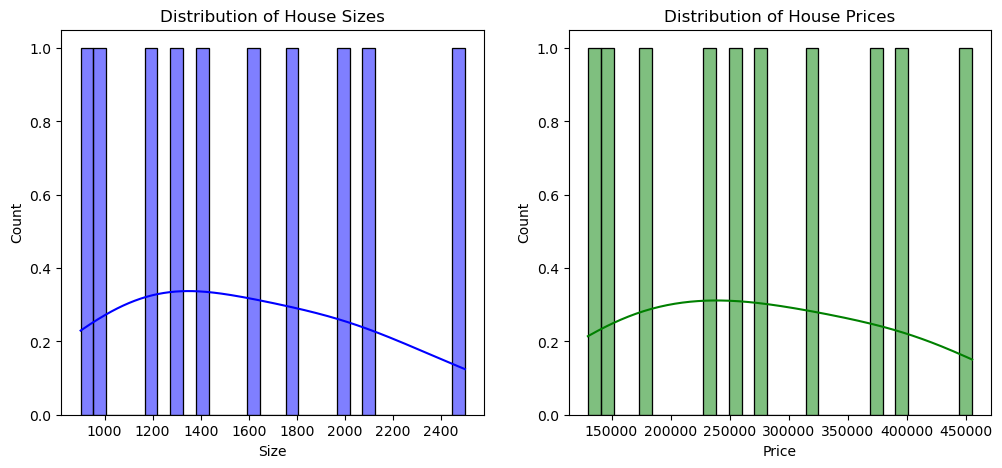

Dataset after encoding:
   Size  Number of Rooms     Price  Location_Suburban  Location_Urban
0  1200                3  250000.0              False            True
1  1800                4  320000.0               True           False
2  1000                2  150000.0              False           False
3  2100                5  400000.0              False            True
4  1600                3  280000.0               True           False


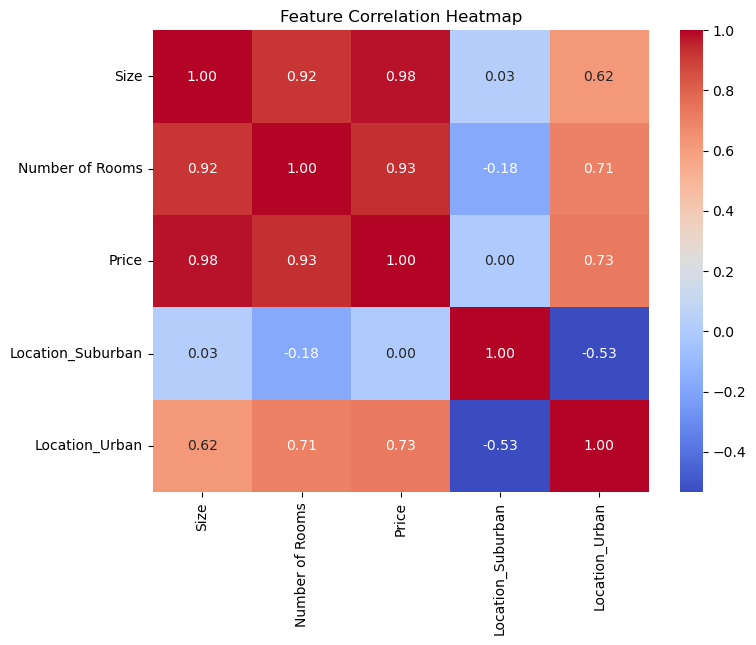

Training set size: (8, 4)
Testing set size: (2, 4)

Model Coefficients:
                     Coefficient
Size               221482.820976
Number of Rooms     32739.602170
Location_Suburban   41550.632911
Location_Urban      73910.488246

Intercept: 124936.7088607595

RMSE: 6167.57
R2 Score: 1.00


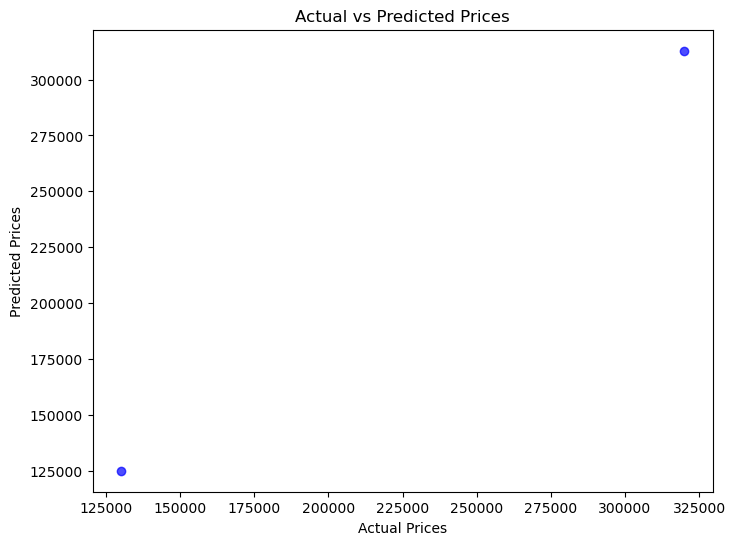

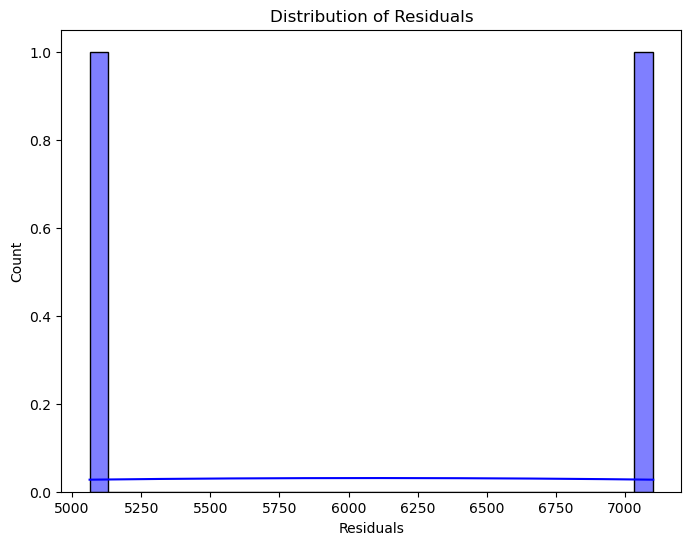

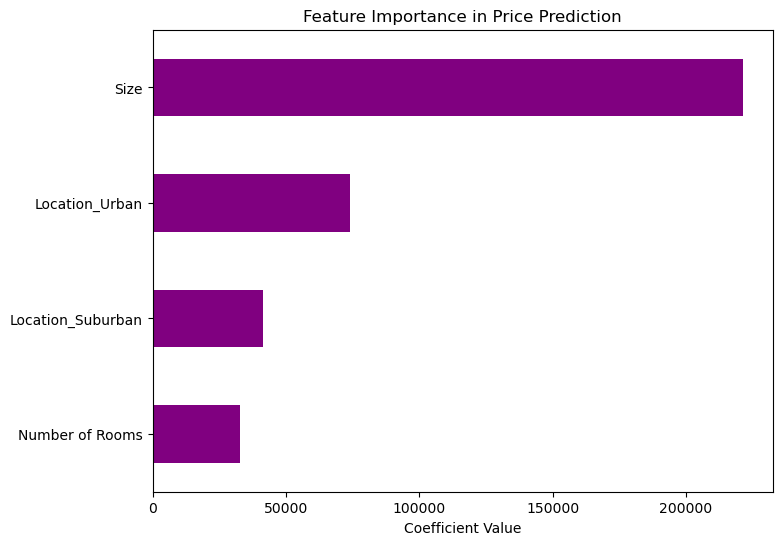

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('house_prices.csv')  # Replace with actual file path
print("First 5 rows of the dataset:")
print(data.head())

# Dataset info
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values (example: median for numerical columns)
data['Size'].fillna(data['Size'].median(), inplace=True)
data['Number of Rooms'].fillna(data['Number of Rooms'].median(), inplace=True)

# Handle outliers (example: capping at 95th percentile)
upper_limit = data['Price'].quantile(0.95)
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit, data['Price'])

# Data Distribution Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Size'], bins=30, kde=True, color='blue')
plt.title("Distribution of House Sizes")

plt.subplot(1, 2, 2)
sns.histplot(data['Price'], bins=30, kde=True, color='green')
plt.title("Distribution of House Prices")

plt.show()

# Encoding the 'Location' column using one-hot encoding
data = pd.get_dummies(data, columns=['Location'], drop_first=True)
print("Dataset after encoding:")
print(data.head())

# Normalize numerical columns
scaler = MinMaxScaler()
data[['Size', 'Number of Rooms']] = scaler.fit_transform(data[['Size', 'Number of Rooms']])

# Feature Selection - Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print(coefficients)

print("\nIntercept:", model.intercept_)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

# Feature Importance (Effect on Price)
feature_importance = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(8, 6))
feature_importance.sort_values().plot(kind="barh", color='purple')
plt.title("Feature Importance in Price Prediction")
plt.xlabel("Coefficient Value")
plt.show()